# Pivot Points Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.mpl_style = 'default'
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 10

In [2]:
import pandas.io.data as web

In [3]:
aapl = web.DataReader('AAPL', 'yahoo', '2005-01-01', '2010-12-31')

In [4]:
aapl.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-12-27,322.850006,325.439999,321.520016,324.680008,62454000,43.568945
2010-12-28,325.909996,326.659973,325.059990,325.469959,43981000,43.674949
2010-12-29,326.220016,326.449982,325.100018,325.290009,40784800,43.650801
2010-12-30,325.479973,325.510014,323.050011,323.659985,39373600,43.432068
2010-12-31,322.949982,323.480007,321.309998,322.560013,48377000,43.284462


In [5]:
aapl = aapl[['Open', 'High', 'Low', 'Adj Close']]

In [6]:
aapl.columns = ['Open', 'High', 'Low', 'Close']

In [7]:
aapl = aapl.ffill()

In [8]:
aapl.tail()

,Open,High,Low,Close
Date,,,,
2010-12-27,322.850006,325.439999,321.520016,43.568945
2010-12-28,325.909996,326.659973,325.059990,43.674949
2010-12-29,326.220016,326.449982,325.100018,43.650801
2010-12-30,325.479973,325.510014,323.050011,43.432068
2010-12-31,322.949982,323.480007,321.309998,43.284462


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


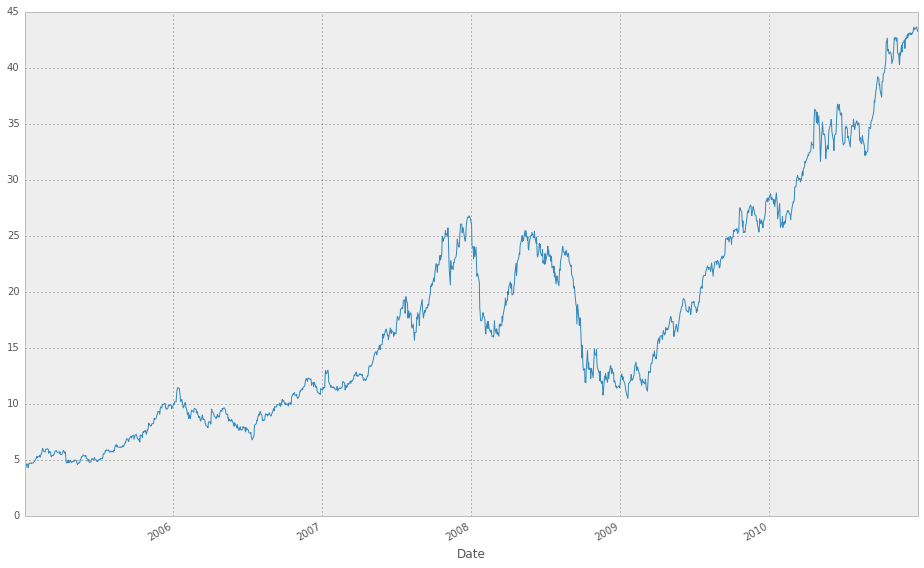

In [9]:
aapl.Close.plot()

In [10]:
standard_pivots = pd.DataFrame()

# Standard Pivot Points

In [11]:
# R4 = R3 + (H - L) 
# R3 = R2 + (H - L)
# R2 = PP + (H - L)
# R1 = (2 * PP) - LOW
# PP = (HIGH + LOW + CLOSE) / 3
# S1 = (2 * PP) - HIGH
# S2 = PP - (H - L)
# S3 = S2 - (H - L)  
# S4 = S3 - (H - L) 
standard_pivots['PP'] = (aapl['High'] + aapl['Low'] + aapl['Close'])/3
standard_pivots['R1'] = 2 * standard_pivots['PP'] - aapl['Low']
standard_pivots['R2'] = standard_pivots['PP'] + aapl['High'] - aapl['Low']
standard_pivots['R3'] = standard_pivots['R2'] + aapl['High'] - aapl['Low']
standard_pivots['R4'] = standard_pivots['R3'] + aapl['High'] - aapl['Low']
standard_pivots['S1'] = 2 * standard_pivots['PP'] - aapl['High']
standard_pivots['S2'] = standard_pivots['PP'] - aapl['High'] + aapl['Low']
standard_pivots['S3'] = standard_pivots['S2'] - aapl['High'] + aapl['Low']
standard_pivots['S4'] = standard_pivots['S3'] - aapl['High'] + aapl['Low']

In [12]:
standard_pivots.tail()

,PP,R1,R2,R3,R4,S1,S2,S3,S4
Date,,,,,,,,,
2010-12-27,230.176320,138.832624,234.096303,238.016286,241.936269,134.912641,226.256337,222.336354,218.416371
2010-12-28,231.798304,138.536618,233.398287,234.998270,236.598253,136.936635,230.198321,228.598338,226.998355
2010-12-29,231.733600,138.367183,233.083564,234.433528,235.783492,137.017219,230.383636,229.033672,227.683708
2010-12-30,230.664031,138.278051,233.124034,235.584037,238.044040,135.818048,228.204028,225.744025,223.284022
2010-12-31,229.358156,137.406313,231.528165,233.698174,235.868183,135.236304,227.188147,225.018138,222.848129


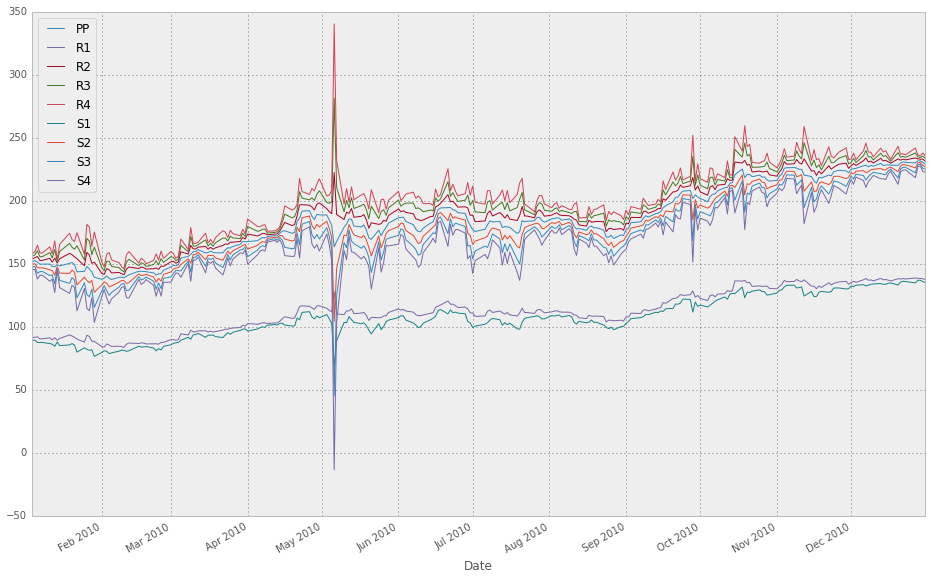

In [13]:
standard_pivots['2010'].plot()

# Camarilla Pivot Points

In [14]:
# R4 = (H - L) * 1.1/2 + C 
# R3 = (H - L) * 1.1/4 + C
# R2 = (H - L) * 1.1/6 + C
# R1 = (H - L) * 1.1/12 + C
# S1 = C - (H - L) * 1.1/12
# S2 = C - (H - L) * 1.1/6
# S3 = C - (H - L) * 1.1/4
# S4 = C - (H - L) * 1.1/2
camarilla_pivots = pd.DataFrame()
camarilla_pivots['R1'] = ((aapl['High'] - aapl['Low'])*1.1/12) + aapl['Close']
camarilla_pivots['R2'] = ((aapl['High'] - aapl['Low'])*1.1/6) + aapl['Close']
camarilla_pivots['R3'] = ((aapl['High'] - aapl['Low'])*1.1/4) + aapl['Close']
camarilla_pivots['R4'] = ((aapl['High'] - aapl['Low'])*1.1/2) + aapl['Close']
camarilla_pivots['S1'] = -((aapl['High'] - aapl['Low'])*1.1/12) + aapl['Close']
camarilla_pivots['S2'] = -((aapl['High'] - aapl['Low'])*1.1/6) + aapl['Close']
camarilla_pivots['S3'] = -((aapl['High'] - aapl['Low'])*1.1/4) + aapl['Close']
camarilla_pivots['S4'] = -((aapl['High'] - aapl['Low'])*1.1/2) + aapl['Close']

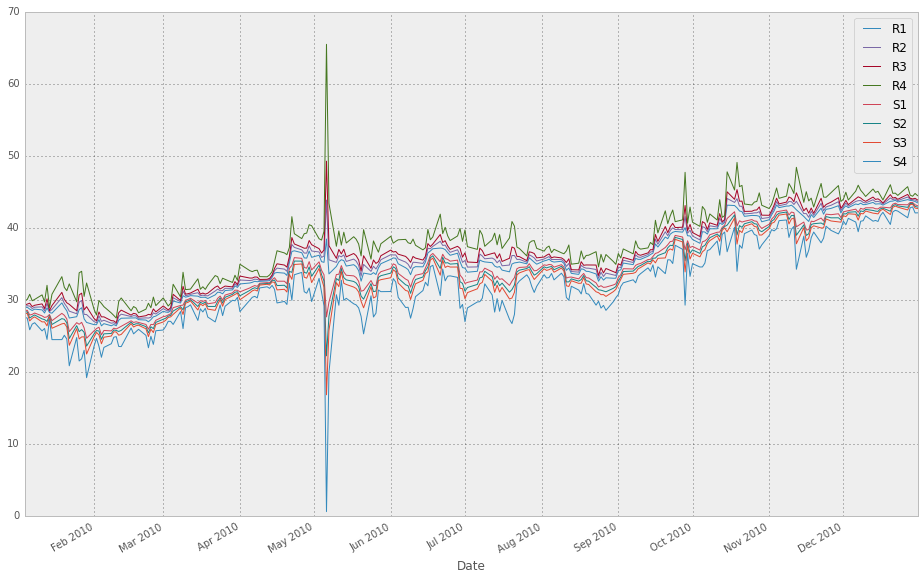

In [15]:
camarilla_pivots['2010'].plot()

# Woodie Pivot Points

In [16]:
# R4 = R3 + (H - L)
# R3 = H + 2 * (PP - L) 
# R2 = PP + (H - L)
# R1 = (2 * PP) - LOW
# PP = (HIGH + LOW + (OPEN * 2)) / 4
# S1 = (2 * PP) - HIGH
# S2 = PP - (H - L)
# S3 = L - 2 * (H - PP) 
# S4 = S3 - (H - L)

woodie_pivots = pd.DataFrame()
woodie_pivots['PP'] = (aapl['High'] + aapl['Low'] + aapl['Open'] * 2)/4
woodie_pivots['R1'] = 2 * woodie_pivots['PP'] - aapl['Low']
woodie_pivots['R2'] = woodie_pivots['PP'] + aapl['High'] - aapl['Low']
woodie_pivots['R3'] = aapl['High'] + 2 * (woodie_pivots['PP'] - aapl['Low'])
woodie_pivots['R4'] = woodie_pivots['R3'] + aapl['High'] - aapl['Low']
woodie_pivots['S1'] = 2 * woodie_pivots['PP'] - aapl['High']
woodie_pivots['S2'] = woodie_pivots['PP'] - aapl['High'] + aapl['Low']
woodie_pivots['S3'] = aapl['Low'] - 2 * (aapl['High'] - woodie_pivots['PP'])
woodie_pivots['S4'] = woodie_pivots['S3'] - aapl['High'] + aapl['Low']

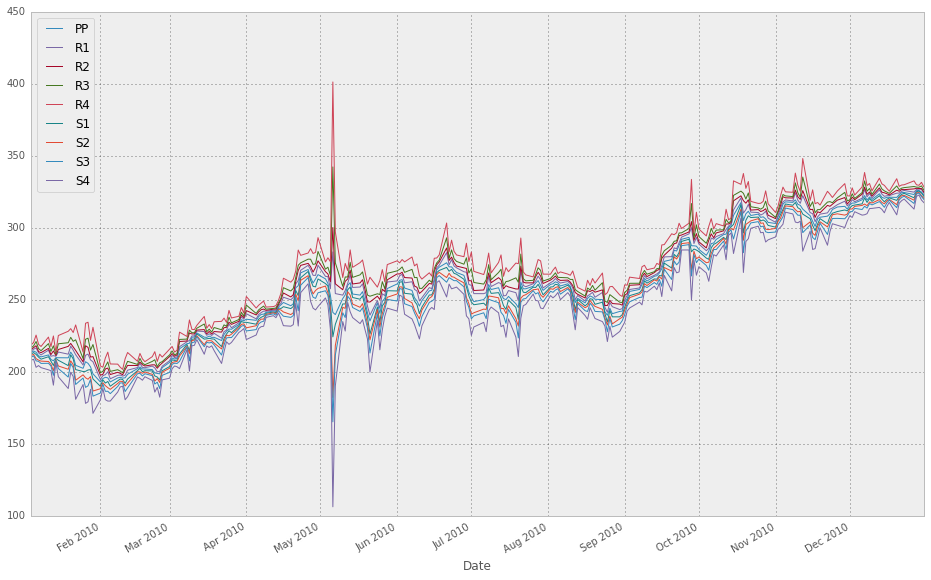

In [17]:
woodie_pivots['2010'].plot()

# Floor Pivot Points

In [18]:
# R3 = (P - S1) + R2
# R2 = (P - S1) + R1
# R1 = (2*P) - L
# PP = (H + L + C)/3
# S1 =(2*P) – H
# S2 = P - (R1 - S1)
# S3 = P - (R2 - S1)
floor_pivots = pd.DataFrame()
floor_pivots['PP'] = (aapl['High'] + aapl['Low'] + aapl['Close'])/3
floor_pivots['R1'] = 2 * floor_pivots['PP'] - aapl['Low']
floor_pivots['S1'] = 2 * floor_pivots['PP'] - aapl['High']
floor_pivots['R2'] = floor_pivots['PP'] - floor_pivots['S1'] + floor_pivots['R1']
floor_pivots['S2'] = floor_pivots['PP'] - floor_pivots['R1'] + floor_pivots['S1']
floor_pivots['R3'] = floor_pivots['PP'] - floor_pivots['S1'] + floor_pivots['R2']
floor_pivots['S3'] = floor_pivots['PP'] - floor_pivots['R2'] + floor_pivots['S1']

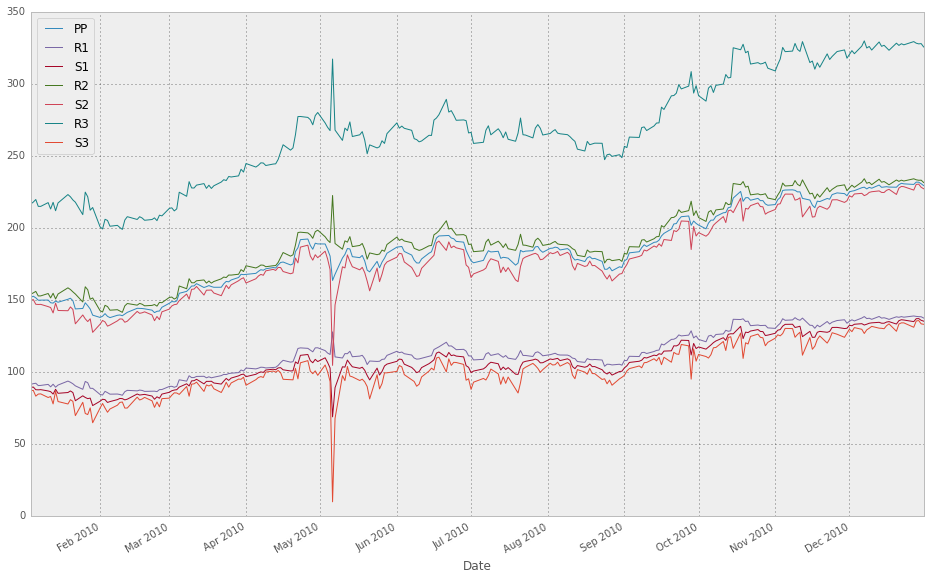

In [19]:
floor_pivots['2010'].plot()

# DeMark Pivot Points

In [20]:
# If Close < Open then X = (H + (L * 2) + C) 
# If Close > Open then X = ((H * 2) + L + C) 
# If Close = Open then X = (H + L + (C * 2)) 
# R1 = X / 2 - L
# PP = X / 4 
# S1 = X / 2 - H

def calc_x(row):
    if row['Close'] < row['Open']:
        return (row['High'] + row['Low'] * 2 + row['Close'])
    if row['Close'] > row['Open']:
        return (row['High'] * 2 + row['Low'] + row['Close'])
    if row['Close'] == row['Open']:
        return (row['High'] + row['Low'] + 2 * row['Close'])
        

demark_pivots = pd.DataFrame()
demark_pivots['X'] = aapl.apply(calc_x, axis=1)
demark_pivots['PP'] = demark_pivots['X']/4
demark_pivots['R1'] = demark_pivots['X']/2 - aapl['Low']
demark_pivots['S1'] = demark_pivots['X']/2 - aapl['High']
demark_pivots = demark_pivots[['R1', 'PP', 'S1']]

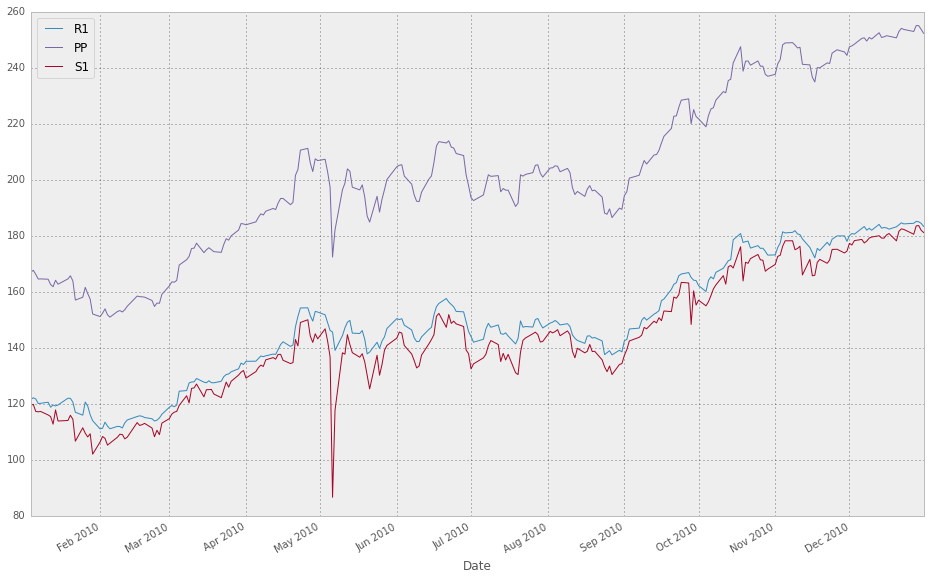

In [21]:
demark_pivots['2010'].plot()